### torch function
整理学习过程中使用到的pytorch中计算张量及向量的方法

> 转置函数：transpose

In [2]:
import torch

# transpose -> 输入有两个参数，即针对哪两个维度进行转置
x = torch.randn(3, 4)
print(x)
print(x.transpose(0, 1))

tensor([[ 1.8365,  0.1253,  0.3040,  1.3478],
        [-0.6326,  0.0199,  0.7644,  0.3058],
        [ 0.7165,  0.7973,  0.5126, -0.0642]])
tensor([[ 1.8365, -0.6326,  0.7165],
        [ 0.1253,  0.0199,  0.7973],
        [ 0.3040,  0.7644,  0.5126],
        [ 1.3478,  0.3058, -0.0642]])


> 矩阵相乘：bmm和matmul

In [4]:
# 1.bmm函数(批量矩阵矩阵乘法) batch_size不参与计算
# input: (((batch_size , M, N),(batch_size, N, P)) -> output: (batch_size, M, P))
x1 = torch.randn(2, 3, 4)
x2 = torch.randn(2, 4, 5)
x3 = torch.bmm(x1, x2)
print(x3) # (2, 3, 5)

# 2.matual函数 更为常用的矩阵相乘函数(矩阵与矩阵, 向量与矩阵) 
# matual会根据输入矩阵类型来自动判断执行哪种类型的矩阵乘法
print(torch.matmul(x1, x2))


tensor([[[-0.4149,  0.3860, -0.4946, -0.5904, -0.7603],
         [ 0.4151, -0.2205,  1.3586,  1.3353,  0.9625],
         [ 2.2139, -1.9542, -1.1125, -0.1435, -1.2413]],

        [[-0.6122, -2.2527, -2.1380,  3.7162, -1.4753],
         [ 0.2149,  1.5300, -0.2037, -2.0867,  0.2021],
         [-1.4561,  0.5424, -0.9549, -1.6903, -0.9102]]])
tensor([[[-0.4149,  0.3860, -0.4946, -0.5904, -0.7603],
         [ 0.4151, -0.2205,  1.3586,  1.3353,  0.9625],
         [ 2.2139, -1.9542, -1.1125, -0.1435, -1.2413]],

        [[-0.6122, -2.2527, -2.1380,  3.7162, -1.4753],
         [ 0.2149,  1.5300, -0.2037, -2.0867,  0.2021],
         [-1.4561,  0.5424, -0.9549, -1.6903, -0.9102]]])


> 归一化：softmax

In [8]:
# softmax函数对数据进行缩放到0和1之间，且每一行的和为1
import torch.nn.functional as F
x = torch.randn(2, 3)
print(x)
x1 = F.softmax(x, dim=-1)
print(x1)

tensor([[ 1.9635, -0.5754, -1.0809],
        [ 0.4179,  2.0399,  0.4207]])
tensor([[0.8876, 0.0701, 0.0423],
        [0.1415, 0.7166, 0.1419]])


> 矩阵拼接：cat

In [3]:
import torch
x1 = torch.randn(3, 4)
x2 = torch.randn(3, 2)
print(x1)
print(x2)
print(torch.cat((x1,x2), dim=1)) # (3,6)

tensor([[-0.3381,  0.5526, -1.5070, -0.8956],
        [ 2.0884,  0.0223, -0.3020,  0.5948],
        [-1.7742, -0.3091, -0.0607,  1.8561]])
tensor([[-0.2869,  1.0878],
        [-0.6471, -0.5091],
        [-0.6910, -0.7526]])
tensor([[-0.3381,  0.5526, -1.5070, -0.8956, -0.2869,  1.0878],
        [ 2.0884,  0.0223, -0.3020,  0.5948, -0.6471, -0.5091],
        [-1.7742, -0.3091, -0.0607,  1.8561, -0.6910, -0.7526]])


> 矩阵缩放：view

In [4]:
# 对output和target进行view操作后再计算loss的必要性
output = torch.randn(2, 3, 20) # batch_size, n_step, vec_size
target = torch.randn(2, 3) # batch_size, n_step

# 相当于将所有batch的数据展开(堆叠), 然后计算loss
output = output.view(-1, 20) # (6, 20)
target = target.view(-1) # 6  

tensor([[0., 0., 0.],
        [0., 0., 0.]])


> 张量降维：squeeze

In [29]:
x1 = torch.tensor([[1], [2], [3]]) # n * 1
x2 = torch.randn(1, 2, 1) # 1*n

# squeeze(1)和squeeze(-1)都是对n*1的张量进行降维，结果为n
print(x1.squeeze(1))
print(x1.squeeze(-1))

# squeeze(0)是对1*n的张量进行降维，结果为n
# squeeze()是去除所有大小为1的维度
print(x2.squeeze())

# unsqueeze的作用则是增维操作

tensor([1, 2, 3])
tensor([1, 2, 3])
tensor([ 0.5660, -0.9038])


### 画图函数

> heatmap：热图

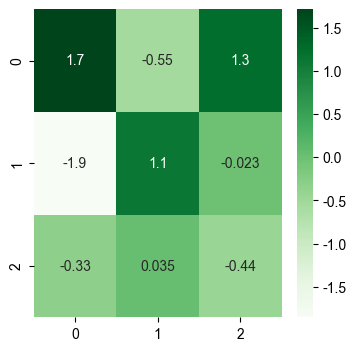

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"]=['Arial Unicode MS'] # 用来设定字体样式
plt.rcParams['font.sans-serif']=['Arial Unicode MS'] # 用来设定无衬线字体样式
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

# 创建数据集
x = [i for i in range(3)]
y = x
weight = torch.randn(3, 3)

plt.figure(figsize=(4, 4))
sns.heatmap(weight, annot=True, cbar=True,
            xticklabels=x, yticklabels=y, cmap='Greens')
plt.show()